# CMSC 478-ML Homework 2
## By: Pravar Kochar

In [9]:
import timeit
import matplotlib.pyplot as plot
import numpy as np

# Include the self made Data class.
from HW2_functions import Data
from IPython.display import display, Latex

# Initialize in the data from the .csv file.
car = Data()

---
__Question 1a__. Print the first 5 values of each of the scaled features as a single table. Calculate and report the
mean and variance of each of the scaled features as a single table.

---

In [10]:
car.scale_features()
car.print_scaled_feature_and_sc_mean_var()

Print           scaled_cyl    scaled_disp    scaled_hp    scaled_drat    scaled_wt    scaled_qsec    scaled_vs    scaled_am    scaled_gear    scaled_carb
--------------  ------------  -------------  -----------  -------------  -----------  -------------  -----------  -----------  -------------  -------------
First 5         0.153         -0.107         -0.580       -0.544         0.577        -0.620         -0.790       -0.882       1.209          0.430
                0.153         -0.107         -0.580       -0.544         0.577        -0.355         -0.471       -0.882       1.209          0.430
                0.457         -1.244         -1.006       -0.796         0.482        -0.932         0.433        1.134        1.209          0.430
                0.221         -0.107         0.224        -0.544         -0.982       -0.002         0.905        1.134        -0.827         -0.947
                -0.234        1.031          1.060        0.420          -0.849       0.231      

---
__Question 1b.__ Learn a multiple linear regression hypothesis to predict mpg based on the scaled
 features using
the gradient descent algorithm.

---

Multiple linear hypothesis to predict:
$\begin{equation}
    h_\Theta (x) := \hat{\Theta}_0 * x_0 + \hat{\Theta}_1 * x_1 + \cdots + \hat{\Theta}_n * x_n
\end{equation}$

In [11]:
# The hyperparameter default values are the ones that are given,
# Theta_lst = 0 vector, learning rate = 0.20, convergence threshold = 10^-5
theta_lst = car.gradient_descent()
theta_lst = np.array(theta_lst)
theta_lst.reshape(-1, 1)
np.set_printoptions(precision=5)
# Print the Theta values
display(Latex(f"$\hat{{\Theta}}_{{GD}} = {theta_lst[:, None]}$"))

<IPython.core.display.Latex object>

---
__Question 1c.__ Repeat 1b for the following choices of the learning rate.
.10, .15, .20, .25, and .30.
    i. For each of the above learning rates, plot cost function over iterations.

---

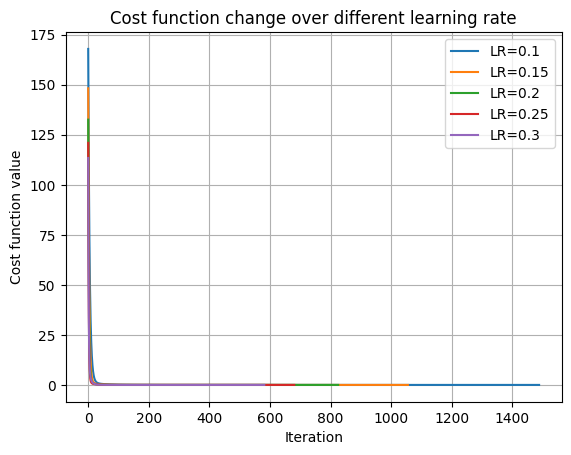

In [12]:
rate_lst = [.10, .15, .20, .25, .30]
time_lst = []
# Redo .20 to time it.
for rate in rate_lst:
    # Time the function and store in a list.
    start = timeit.default_timer()
    car.gradient_descent(rate)
    end = timeit.default_timer()

    time_lst.append(end - start)

# Plot the cost functions.
car.cost_fn_plot()

__Question 1c cont.__
    ii. Make a plot of the total run time of the gradient descent algorithm versus the
        learning rate.

---

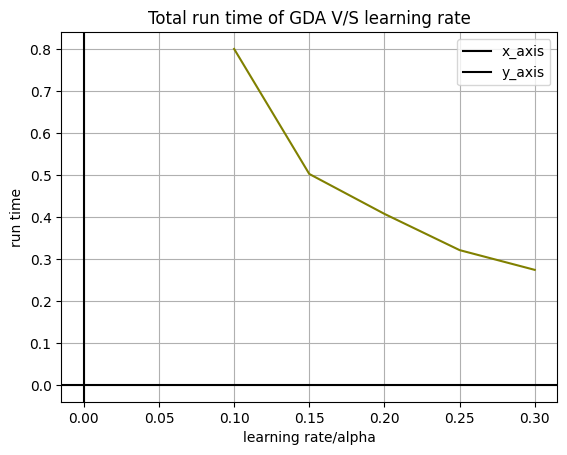

In [13]:
def plot_time():
    """
    Function to plot the time vs learning rate.
    :return: None
    """
    plot.plot(rate_lst, time_lst, 'olive')
    plot.title("Total run time of GDA V/S learning rate")
    plot.axvline(x=0, c='black', label='x_axis')
    plot.axhline(y=0, c='black', label='y_axis')
    plot.xlabel('learning rate/alpha')
    plot.ylabel('run time')
    plot.legend()
    plot.grid()
    plot.show()

# Plot the time vs learning rates.
plot_time()

---
__Question 1d.__ What can you say about the relationship between learning rate and rate of
learning/convergence based on your solution to 1c?

---

The gradient descent algorithm converges sooner for a higher value of the learning rate.
The rate of the decline in cost is larger for a higher value of the learning rate
On average the trend of the learning rate to rate of learning has an inverse relation for our
rates, i.e. increasing the alpha causes the run time to decrease.


---
__Question 1e.__ Learn a multiple linear regression hypothesis to predict mpg based on the scaled features using
the normal equations method.

---


In [14]:
start = timeit.default_timer()
theta_lst_normal_eq = car.normal_equation()
end = timeit.default_timer()
time_for_normal_eq = end - start

theta_lst_normal_eq = np.array(theta_lst_normal_eq)
theta_lst_normal_eq.reshape(-1, 1)
np.set_printoptions(precision=5)
# Print the Theta values
display(Latex(f"$\hat{{\Theta}}_{{NE}} = {theta_lst_normal_eq[:, None]}$"))

<IPython.core.display.Latex object>

---
__Question 1f.__ Compare the hypotheses learned in 1b and 1e. Provide an explanation of your observation based
on this comparison

---


The $\hat{\Theta}$ values given by each method is given as such:


In [15]:
display(Latex(f"$\hat{{\Theta}}_{{GD}} = {theta_lst[:, None]}$"))
display(Latex(f"$\hat{{\Theta}}_{{NE}} = {theta_lst_normal_eq[:, None]}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

As seen above both the methods have given more or less the same values within marginal error.
(3rd value onwards the error is after 5 decimal places)

And the time taken by both the algorithms is given as follows:

In [16]:
print("GDA max time: ", time_lst[0])
print("NE method time: ", time_for_normal_eq)


GDA max time:  0.8008115999400616
NE method time:  0.0005873999325558543


It can be seen that GDA took longer than NE for our small given data set. For much larger data
sets it is expected that NE takes longer.

$\therefore$ It can be concluded that both the algorithms have ran successfully giving the same
results as they both achieve the same task of finding/estimating the $\hat{\Theta}$ values.
